##### PAIR PROGRAMMING - REGRESIÓN LINEAL 5 - NORMALIZACIÓN

- En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

- En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

1. Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste

In [3]:
df = pd.read_csv('datos/pokePd1.csv', index_col = 0)
df.head()

,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,Grass,318,45,49,49,65,65,45
1,Poison,318,45,49,49,65,65,45
2,Grass,405,60,62,63,80,80,60
3,Poison,405,60,62,63,80,80,60
4,Grass,525,80,82,83,100,100,80


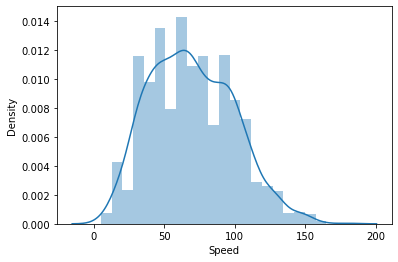

In [4]:
sns.distplot(df["Speed"]);


In [5]:
#El p-valor es menor que 0.05 por lo que rechazamos la HO y nuestros datos no son normales

stats.shapiro(df['Speed'])

ShapiroResult(statistic=0.9851946830749512, pvalue=1.1599554650132404e-11)

In [6]:
#Observando la distribución de la gráfica anterior, decidimos aplicar en primer momento para la normalización el método MinMaxScaler
df_num = df.select_dtypes(include = np.number)

In [7]:
#Esta técnica de normalizado es una de las más importantes, va a transformar las variables escalando cada una de ellas a un rango determinado, siendo este por defecto 0-1

minmax = MinMaxScaler()

In [8]:
minmax.fit(df_num[['Speed']])

MinMaxScaler()

In [9]:
X_normalizadas = minmax.transform(df_num[["Speed"]])

In [10]:
X_normalizadas.max(axis=0)

array([1.])

In [11]:
X_normalizadas.min(axis=0)

array([0.])

In [12]:
#Convertirmos el array que nos devuelve el método a dataframe

numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["Speed_Sklearn"])
numericas_minmax.head(2)

,Speed_Sklearn
0,0.228571
1,0.228571


In [13]:
#Incorporamos la nueva columna al dataframe

df_num["Speed_Sklearn"] = numericas_minmax
df_num.head(2)

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Speed_Sklearn
0,318,45,49,49,65,65,45,0.228571
1,318,45,49,49,65,65,45,0.228571


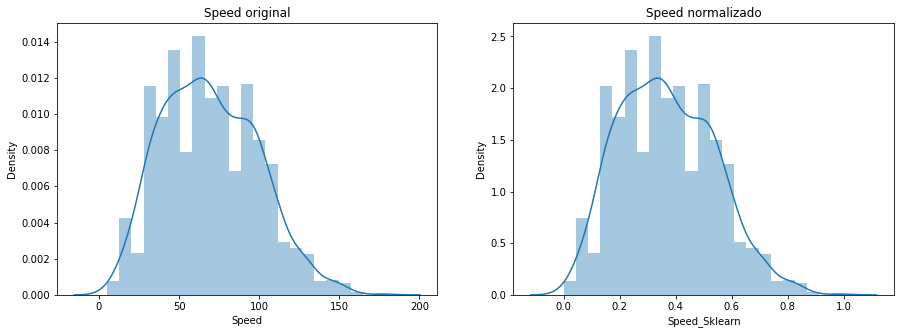

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Speed original')
axes[1].set_title('Speed normalizado')

sns.distplot(df_num['Speed'] ,ax = axes[0])
sns.distplot(df_num['Speed_Sklearn'], ax = axes[1]);

In [15]:
#Observamos que el p-valor es menor que 0.05 y por tanto no podemos rechazar la H0; es decir, nuestros datos no son normales.

stats.shapiro(df_num['Speed_Sklearn'])

ShapiroResult(statistic=0.9851913452148438, pvalue=1.1554586280826395e-11)

In [16]:
df_num.head()

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Speed_Sklearn
0,318,45,49,49,65,65,45,0.228571
1,318,45,49,49,65,65,45,0.228571
2,405,60,62,63,80,80,60,0.314286
3,405,60,62,63,80,80,60,0.314286
4,525,80,82,83,100,100,80,0.428571


In [17]:
# Aplicamos a continuación la transformación con boxcox, la cual solo se preocupa de calcular el valor de lambda que varía de -5 a 5. 
# Se dice que un valor de lambda es el mejor si es capaz de aproximar la curva no normal a una normal.

df_num['Speed_BOX'], lambda_ajustada = stats.boxcox(df_num['Speed'])

In [18]:
lambda_ajustada

0.6367620326431778

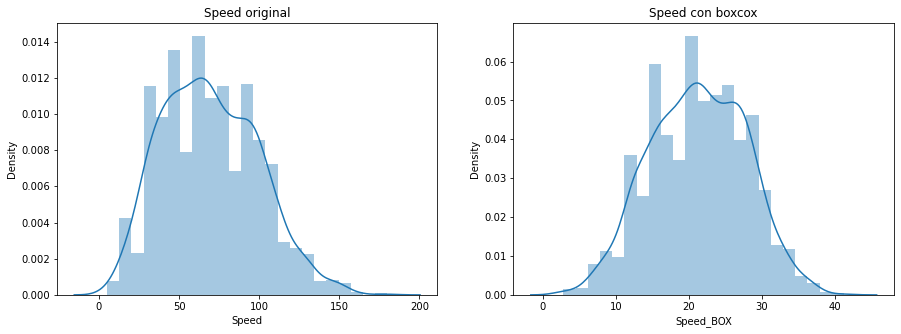

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Speed original')
axes[1].set_title('Speed con boxcox')

sns.distplot(df_num['Speed'] ,ax = axes[0])
sns.distplot(df_num['Speed_BOX'], ax = axes[1]);

In [20]:
#Observamos que el p-valor es menor que 0.05 y, por lo tanto, rechazamos la H0 (datos son normales); por tanto, nuestros datos no son normales

stats.shapiro(df_num['Speed_BOX'])

ShapiroResult(statistic=0.9938111901283264, pvalue=3.6461103718465893e-06)

In [21]:
df.head(2)

,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,Grass,318,45,49,49,65,65,45
1,Poison,318,45,49,49,65,65,45


In [22]:
df_num.head(2)

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Speed_Sklearn,Speed_BOX
0,318,45,49,49,65,65,45,0.228571,16.160251
1,318,45,49,49,65,65,45,0.228571,16.160251


In [23]:
#Incorporamos la columna con la transformación BOXCOX al df original para tener todos los datos juntos

df['Speed_BOX'] = df_num['Speed_BOX']

In [24]:
df.head(2)

,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Speed_BOX
0,Grass,318,45,49,49,65,65,45,16.160251
1,Poison,318,45,49,49,65,65,45,16.160251


2. Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [25]:
df.to_csv('datos/pokePd_normalizado.csv')